# Problem Set 2
By: Bethany Bailey
## HW1
### Exercise 1
1.

In [1]:
from scipy import linalg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:
df = pd.read_csv("matrix_data.txt", header=None, delimiter = ' ')

In [6]:
X = np.array(df)
eigs = np.linalg.eigvals(X)

In [7]:
s_radius = max(eigs)
print("The spectral radius is:", s_radius)

The spectral radius is: 1.00442776945


2.

In [31]:
seq = np.zeros(15000)
for i in range(1,15000):
    X_i = np.linalg.matrix_power(X,i)
    X_i = X_i@X[:,1]
    norm = np.linalg.norm(X_i)
    res = norm**(1/i)
    seq[i] = res

In [32]:
seq[-1000:-1]

array([ 1.00393211,  1.00393214,  1.00393218,  1.00393221,  1.00393225,
        1.00393228,  1.00393232,  1.00393235,  1.00393239,  1.00393243,
        1.00393246,  1.0039325 ,  1.00393253,  1.00393257,  1.0039326 ,
        1.00393264,  1.00393267,  1.00393271,  1.00393274,  1.00393278,
        1.00393281,  1.00393285,  1.00393288,  1.00393292,  1.00393295,
        1.00393299,  1.00393303,  1.00393306,  1.0039331 ,  1.00393313,
        1.00393317,  1.0039332 ,  1.00393324,  1.00393327,  1.00393331,
        1.00393334,  1.00393338,  1.00393341,  1.00393345,  1.00393348,
        1.00393352,  1.00393355,  1.00393359,  1.00393362,  1.00393366,
        1.00393369,  1.00393373,  1.00393376,  1.0039338 ,  1.00393384,
        1.00393387,  1.00393391,  1.00393394,  1.00393398,  1.00393401,
        1.00393405,  1.00393408,  1.00393412,  1.00393415,  1.00393419,
        1.00393422,  1.00393426,  1.00393429,  1.00393433,  1.00393436,
        1.0039344 ,  1.00393443,  1.00393447,  1.0039345 ,  1.00

This looks like it is converging to r(A).

### Exercise 2

In [42]:
x_init = np.random.uniform(0,1, 100)

@njit
def quad(x_0,T):
    res = np.zeros((len(x_0),T))
    i = 0
    for x in x_0:
        x_t = np.zeros(100)
        x_t[0] = x
        res[i][0] = x
        for t in range(1,T):
            res[i][t] = 4* res[i][t-1]*(1- res[i][t-1])
        i+=1
    return res

res = quad(x_init,10000)

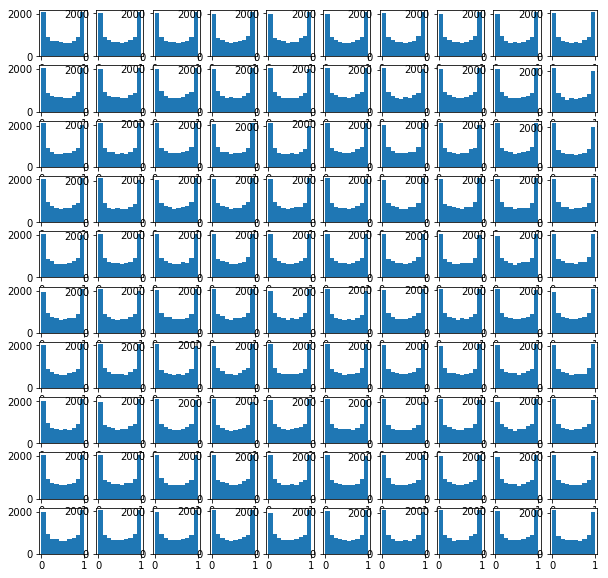

In [44]:
plt.figure(figsize=(10, 10))
i=0
for r in res:
    i+=1
    plt.subplot(10, 10, i)
    plt.hist(r)  
plt.show()

All of these histograms look very similar.

### Exercise 3

In the lecture it was claim that, if $(\mathbb X, g)$ is a dynamical system, $g$ is continuous at $\hat{x} \in \mathbb X$ and, for some $x \in \mathbb X$, $g^t(x) \to \hat{x}$, then $\hat{x}$ is a steady state of $(\mathbb X, g)$.

Proof: To show that $\hat{x}$ is a steady sate of $(\mathbb X, g)$, we must show that $\hat{x}$ is a fixed point (i.e. $g^t(\hat{x}) = \hat{x}$).

We know that $g^t(x) \to \hat{x}$, thus, $lim_{t \to \infty} g^t(x) = \hat{x} \implies lim_{t \to \infty} g^{t-1}(x) = \hat{x}$. 

Because $g$ is continuous at $\hat x \in \mathbb X$, we know by continuity that $g^t(lim_{t \to \infty} g^{t-1}(x)) = lim_{t \to \infty} g^t(g^{t-1}(x)) = g_t(\hat{x}) = \hat{x}$.

Thus, $\hat{x} is a fixed point and thus a steady state.

## HW2
### Exercise 1

In [45]:
from scipy.stats import norm
from scipy.stats import beta

1, 2, and 3.

In [58]:
class KDE():
    
    def __init__(self, X, h="silverman"):
        self.X = X
        self.n = len(X)
        if h == "silverman":
            # Formula sourced from Wikipedia page for Kernal Density Estimation
            self.h = 1.06*(np.var(self.X)**0.5)*(self.n**(-0.2)) 
        else:
            self.h = h
    
    def f(self, x):
        f_x = np.zeros(len(x))
        outside = 1/(self.h*self.n)
        for j in range(len(x)):
            s = 0
            for i in range(self.n):
                inside = (x[j] - self.X[i])/self.h
                s += outside*norm.pdf(inside)
            f_x[j] = s
        return f_x

In [60]:
# Simulate data from distributions
X_1 = np.random.beta(2, 2, 100)
X_2 = np.random.beta(2, 5, 100)
X_3 = np.random.beta(0.5, 0.5, 100)

x = np.linspace(0,1,100)

# Do KDE
K_1 = KDE(X_1)
K_2 = KDE(X_2)
K_3 = KDE(X_3)

# Estimate f(x)
f_1 = K_1.f(x)
f_2 = K_2.f(x)
f_3 = K_3.f(x)

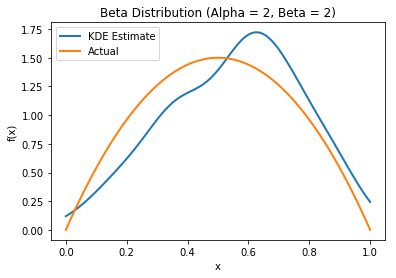

In [61]:
plt.plot(x, f_1, linewidth=2.0)
plt.plot(x, beta.pdf(x, 2, 2), linewidth=2.0)
plt.legend(['KDE Estimate', 'Actual'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Beta Distribution (Alpha = 2, Beta = 2)')
plt.show()

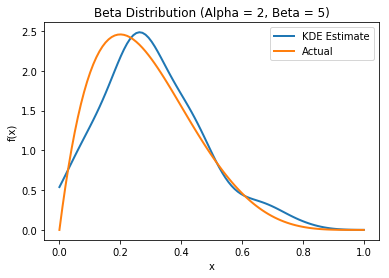

In [62]:
plt.plot(x, f_2, linewidth=2.0)
plt.plot(x, beta.pdf(x, 2, 5), linewidth=2.0)
plt.legend(['KDE Estimate', 'Actual'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Beta Distribution (Alpha = 2, Beta = 5)')
plt.show()

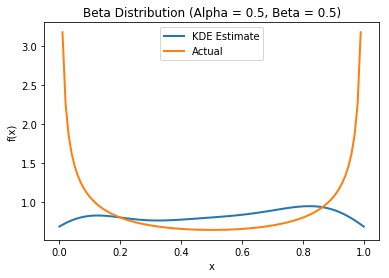

In [63]:
plt.plot(x, f_3, linewidth=2.0)
plt.plot(x, beta.pdf(x, 0.5, 0.5), linewidth=2.0)
plt.legend(['KDE Estimate', 'Actual'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Beta Distribution (Alpha = 0.5, Beta = 0.5)')
plt.show()

As we can see from the above distribution plots, this KDE looks like a good estimator for the first two beta distributions (with higher $\alpha$ and $\beta$ values), but it does not do well on the last distribution with lower values.

### Exercise 2

In [79]:
# Set parameters
rho = 0.9
b = 0.0
sigma = 0.1
mu = -3.0
s = 0.2
my_args = [rho, b, sigma, mu, s]
x = np.linspace(-5, 0, 100)

In [80]:
def simulation(n, args, x):
    rho, b, sigma, mu, s = args
    X_t = np.random.normal(mu, s, n) 
    shocks = np.random.normal(0, 1, n)
    X_tp1 = rho * X_t + b + sigma * shocks
    KDE_tp1 = KDE(X_tp1) 
    f_x_tp1 = KDE_tp1.f(x)
    return f_x_tp1

In [81]:
simulation_10 = simulation(10, my_args, x)
simulation_50 = simulation(50, my_args, x)
simulation_100 = simulation(100, my_args, x)

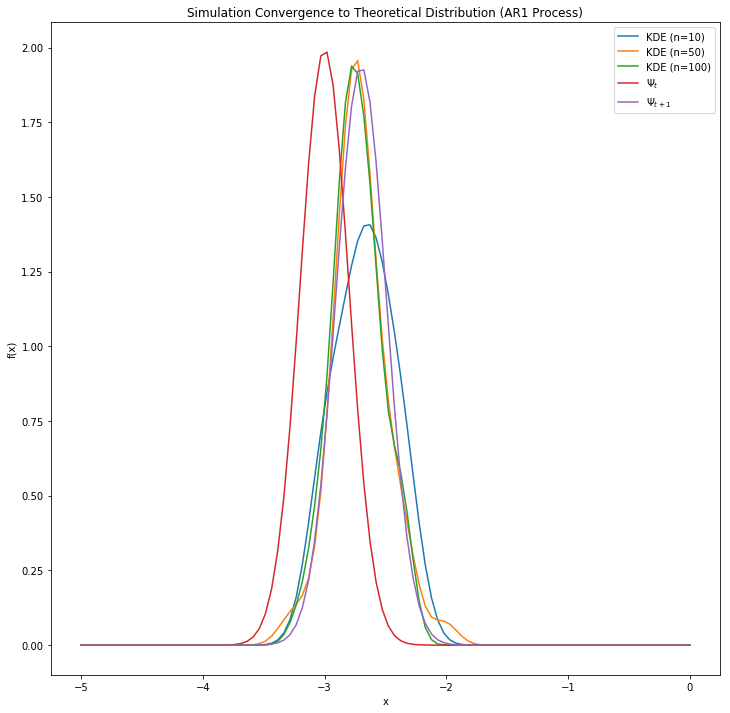

In [86]:
plt.figure(figsize=(12,12))
plt.plot(x, simulation_10)
plt.plot(x, simulation_50)
plt.plot(x, simulation_100)
plt.plot(x, norm.pdf(x, mu, s))
plt.plot(x, norm.pdf(x, rho*mu + b, ((rho**2)*(s**2) + sigma**2)**0.5))
plt.legend(['KDE (n=10)', 'KDE (n=50)', 'KDE (n=100)', '$\Psi_{t}$', '$\Psi_{t+1}$'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Simulation Convergence to Theoretical Distribution (AR1 Process)')
plt.show()

We can see from the graph above that as n increases, the simulation based estimate of $\psi_{t+1}$ does appear to converge to the theoretical distribution.

### Exercise 3

In the lecture it was claimed that, for $n \times n$ matrix $A$, we have
$$ r(A) < 1 \implies A^k \to 0 $$
where convergence is in terms of the spectral norm.
Prove this using Gelfand's formula.

Proof: Gelfand's formula shows that we know that: $r(A) = lim_{k \to \infty}||A^k||^{\frac{1}{k}}$. Thus, we know that $||A^k||^{1/k} \to r(A)$.

This implies (by continuous mapping) that $||A^k|| \to r(A)^{k}$. Thus, we know that if $r(A) < 1$ and $k \to \infty$, then $r(A)^k \to 0 \implies ||A^k|| \to 0$.

## HW3
### Exercise 1

In [87]:
import quantecon as qe

In [88]:
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]

The stationary distribution of the matrix is [[ 0.20254451  0.20379879  0.20742102  0.19505842  0.09287832  0.0503871
   0.03932382  0.00858802]]


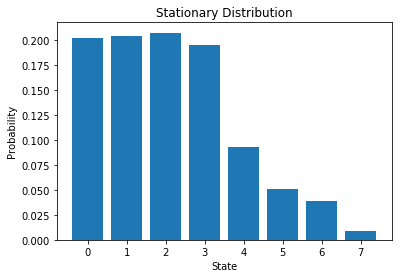

In [93]:
mc = qe.MarkovChain(P)
s_dist = qe.markov.core.mc_compute_stationary(mc.P)
print("The stationary distribution of the matrix is", s_dist)

plt.bar(np.arange(0,8), s_dist.flatten())
plt.title('Stationary Distribution')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

### Exercise 2

In [106]:
n = 10000
sim = mc.simulate_indices(ts_length=n)
s_dist2 = np.zeros(8)
for i in range(8):
    s_dist2[i] = len(sim[sim == i])/len(sim)
print("The stationary distribution of the matrix is", s_dist2)

The stationary distribution of the matrix is [ 0.2089  0.2002  0.2031  0.1965  0.0947  0.0488  0.0391  0.0087]


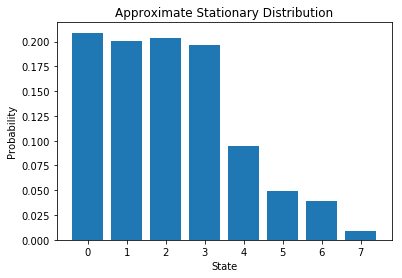

In [107]:
plt.bar(np.arange(0,8), s_dist2)
plt.title('Approximate Stationary Distribution')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

This distribution does look similar to the stationary distribution computed in Exercise 1.

### Exercise 3

In [113]:
N = 10000
T = 10000
paths = np.zeros(N)
for i in range(N):
    sim = mc.simulate_indices(ts_length=T)
    paths[i] = sim[-1]

s_dist3 = np.zeros(8)
for i in range(8):
    s_dist3[i] = len(sim[sim == i])/len(sim)

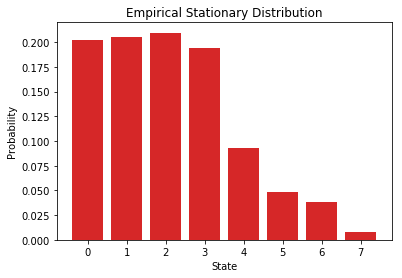

In [115]:
plt.bar(np.arange(0,8), s_dist3)
plt.title('Empirical Stationary Distribution')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

By visually inspecting the above simulation, we can confirm that the empirical distribution is close to the stationary distribution.